# MNIST Digit Classification With Augmentation 🧩✍️

This notebook demonstrates a simple but powerful machine learning task: **classifying handwritten digits** using the MNIST dataset.

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a classic benchmark in the field of machine learning and computer vision. It contains **70,000 grayscale images** of handwritten digits from 0 to 9—60,000 for training and 10,000 for testing. Each image is **28x28 pixels**.

In this notebook, we will:
- Load and explore the MNIST dataset
- Preprocess the data for model input
- Data Augmentation
- Grid Search
- Train a classifier 
- Evaluate its performance
- Visualize predictions and misclassifications

This project is enhancement of the previous MINST image classification. Let's get started! 🚀

### LOAD DATA

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import clone

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

In [2]:
minst = fetch_openml('mnist_784', version=1)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = minst['data'], minst['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### DATA SPLIT

In [6]:
X_train, y_train = X[:6000] , y[:6000]

In [7]:
# Convert to numpy array
X_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy()

### DATA AUGMENTATION

In [8]:
from scipy.ndimage import shift

In [9]:
def shift_image(image, dx, dy):
    # reshape the flat vector into 2D
    image_2d = image.reshape(28, 28)
    # shift the image
    shifted_image_2d = shift(image_2d, [dy, dx], cval=0, mode="constant") 
    # flatten back to 1D
    return shifted_image_2d.reshape(-1)

In [ ]:
image = X_train_numpy[1000]

shifted_image_down = shift_image(image, dx=0, dy=5)
shifted_image_left = shift_image(image, dx=-5, dy=0)

Text(0.5, 1.0, 'Shift Left')

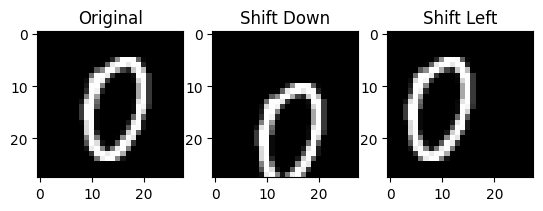

In [11]:
plt.subplot(1, 3, 1)
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(shifted_image_down.reshape(28, 28), cmap='gray')
plt.title('Shift Down')

plt.subplot(1, 3, 3)
plt.imshow(shifted_image_left.reshape(28, 28), cmap='gray')
plt.title('Shift Left')

### DATA AUGMENTATION FOR ALL

In [ ]:
# NumPy arrays do not support .append() method, so we use list comprehension
X_train_augmented = [image for image in X_train_numpy]
y_train_augmented = [label for label in y_train_numpy]

In [ ]:
# Loop over different shift directions:
for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)): # (1,0)=right, (-1,0)=left, (0,1)=down, (0,-1)=up
    # Loop through all original images and their labels
    for image, label in zip(X_train_numpy, y_train_numpy):
        # Add the shifted image to the augmented training set
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [32]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)